##### Nama    : Raudhya Azzahra'      #####
##### NIM     : 2209106034            #####
##### Kelas   : Informatika A2 2022   #####

#### Posttest 3 Kecerdasan Buatan #####

### ================================================================================== ###

#### Import Package #####

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Deklarasi file CSV ####

In [60]:
dhya = pd.read_csv('travel_insurance.csv')
dhya

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


## Visualisasi data ##

##### a. Grafik Batang ######

In [61]:
dhya['Claim'].value_counts()

No     62399
Yes      927
Name: Claim, dtype: int64

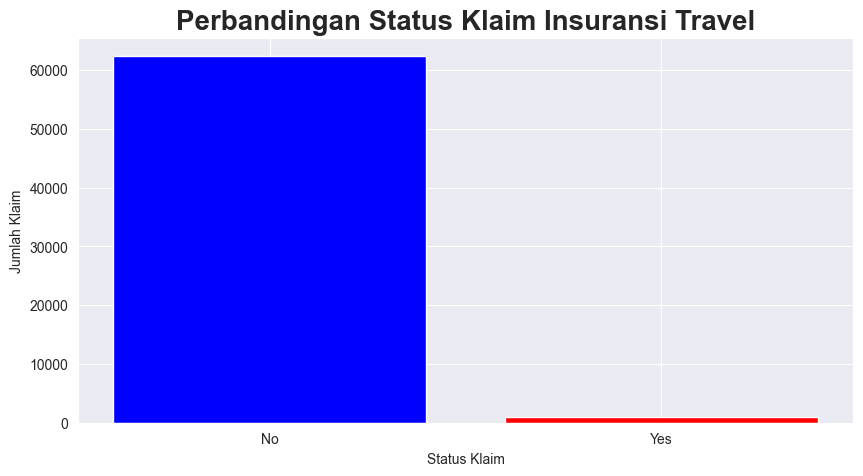

In [62]:
sns.set_style('darkgrid')

dfgender= dhya['Claim'].value_counts()
plt.figure(figsize=(10,5))
plt.xlabel('Status Klaim')
plt.ylabel('Jumlah Klaim')
plt.title ('Perbandingan Status Klaim Insuransi Travel', fontsize=20, fontweight=600)
plt.bar(dfgender.index, dfgender, color=['blue', 'red'])

plt.show()

Perbandingan antara jumlah  orang yang mengajukan klaim asuransi travel mereka dengan yang tidak memiliki perbedaan yang sangat signifikan. Untuk jumlah orang yang <b>tidak</b> melakukan klaim asuransi sejumlah 62.399 orang, sedangkan jumlah orang yang melakukan klaim asuransi 927 orang.

b. Histogram

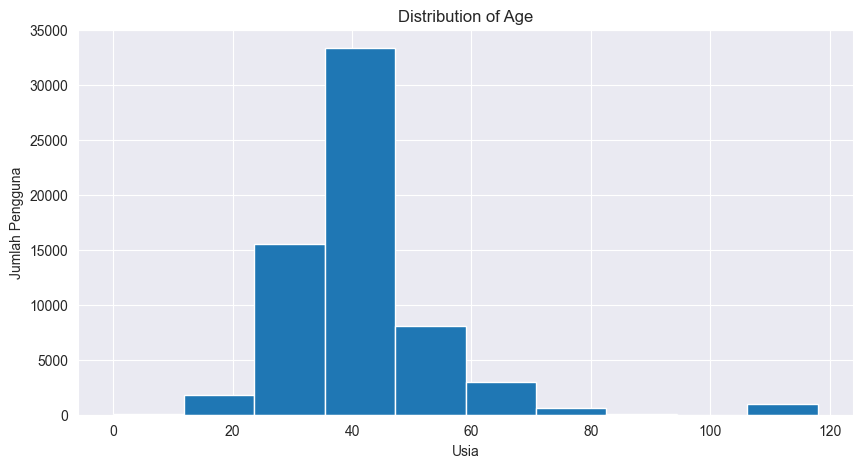

In [63]:
fig = plt.figure(figsize = (10, 5))
plt.hist(dhya['Age'])
plt.xlabel("Usia")
plt.ylabel("Jumlah Pengguna")
plt.title("Distribution of Age")
plt.show()

Bisa dilihat dari histogram diatas usia dengan jumlah orang pemilik travel asuransi 3 teratas berada pada usia 40 tahun, 30 tahun, dan usia 50 tahun.

c. Pie Chart

In [64]:
dhya['Destination'].value_counts()

SINGAPORE                 13255
MALAYSIA                   5930
THAILAND                   5894
CHINA                      4796
AUSTRALIA                  3694
                          ...  
SEYCHELLES                    1
SAMOA                         1
NIGERIA                       1
DOMINICAN REPUBLIC            1
BOSNIA AND HERZEGOVINA        1
Name: Destination, Length: 149, dtype: int64

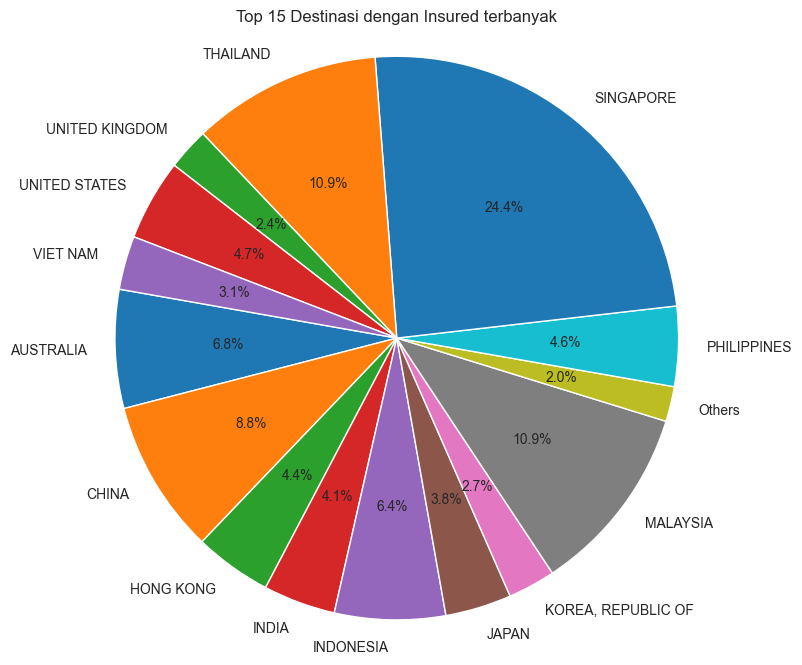

In [65]:
dfDestination= dhya.groupby(by=["Destination"]).size().reset_index(name="counts")

# 15 destinasi teratas berdasarkan jumlahnya
dfTop15 = dfDestination.nlargest(15, ['counts'])
dfTop15['DestinationNew'] = np.where(dfTop15['counts'] > 1090, dfTop15['Destination'], 'Others')

# Mengelompokkan top destinasi teratas dan menghitung jumlahnya
topDestination = dfTop15.groupby('DestinationNew')['counts'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(topDestination['counts'], labels= topDestination['DestinationNew'], autopct='%1.1f%%', startangle=170)
plt.title('Top 15 Destinasi dengan Insured terbanyak')
plt.axis('equal') 

plt.show()

Pie chart diatas memperlihatkan bahwa dari 149 destinasi yang ada, top 15 destinasi terpopulernya terdiri atas Singapura, Thailand, Malaysia, China, Australia, Indonesia, Amerika Serikat, Filipina, Hongkong, India, Jepang, Vietnam, Korea, Inggris, dan negara lainnya.

d. Scatter Plot 

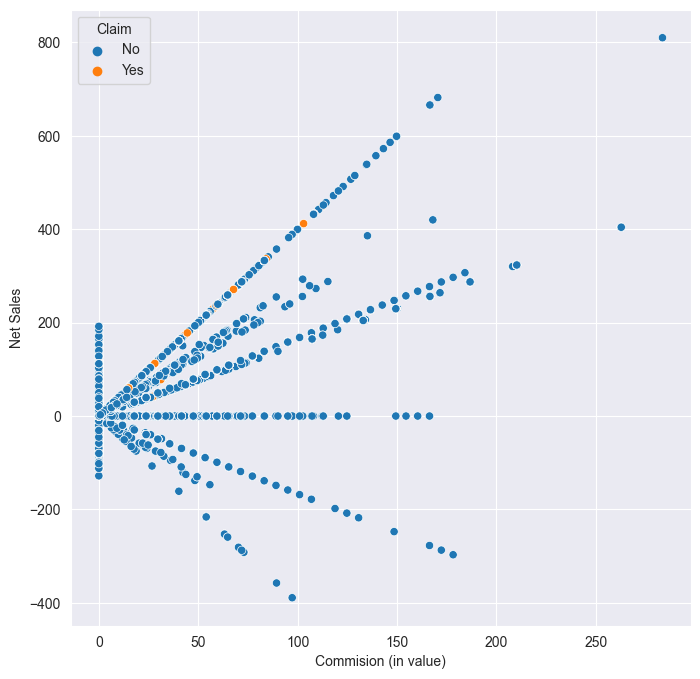

In [66]:
plt.figure(figsize=(8,8))

sns.scatterplot(dhya,
             x = "Commision (in value)",
             y = "Net Sales",
             hue = 'Claim'
             )
plt.show()

Dari Scatter Plot diatas dapat dilihat bahwa *Commision* dan *Net Sales* keduanya saling berhubungan dan distribusinya terlihat sama (distribusi linear).

e. Box Plot

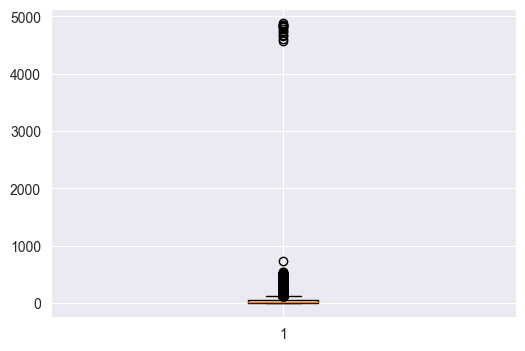

In [67]:
fig = plt.figure(figsize =(6,4 ))
plt.boxplot(dhya['Duration'])
plt.show()


Boxplot diatas menunjukkan distribusi data dari fitur Durasi. Bisa kita lihat bahwa ada beberapa outlier yang menunjukkan nilai negatif dari durasi, yaitu waktu yang seharusnya tidak mungkin terjadi.

f. Heatmap

<AxesSubplot: >

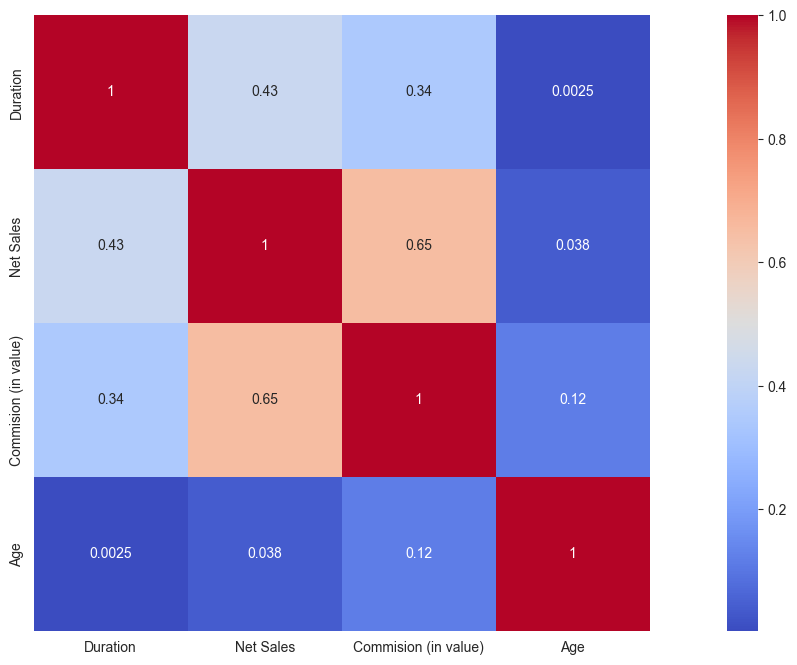

In [68]:
plt.figure(figsize = (20,8))
sns.heatmap(dhya.corr(), square=True,annot=True,cmap= 'coolwarm')

Dari heatmap diatas dapat dilihat bahwa terdapat korelasi yang tinggi antara *Commision* dan juga *Net Sales*. Hal ini terjadi karena persentase yang didapat oleh perusahaan diambil dari nilai *Net Sales*. Selain itu juga terlihat bahwa terdapat korelasi antara *Net Sales* dan *Commision* dengan *Duration*.